# Análise Exploratória

In [14]:
from utils import carrega_dataset
import seaborn as sns

sns.set_theme()
sns.set_theme("notebook")
sns.set(rc={"figure.figsize": [12, 7]})

dataset = carrega_dataset()

dataset


Stored 'dataset' (DataFrame)


,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.1,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.1,0.407564,0.408789,31.562586,4303.94303
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.404617,0.40167,30.74824,4203.027624
775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735


## Histograma de Yield

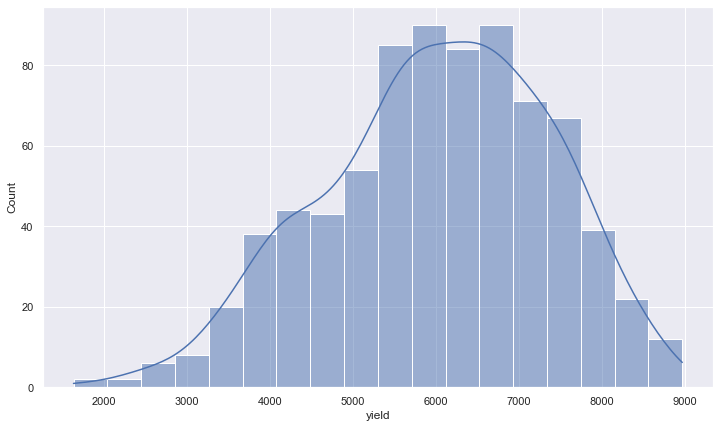

In [6]:
sns.histplot(data=dataset, x='yield', kde=True);

## Clonesize x Abelha Dominante x Temperatura Média x Yield

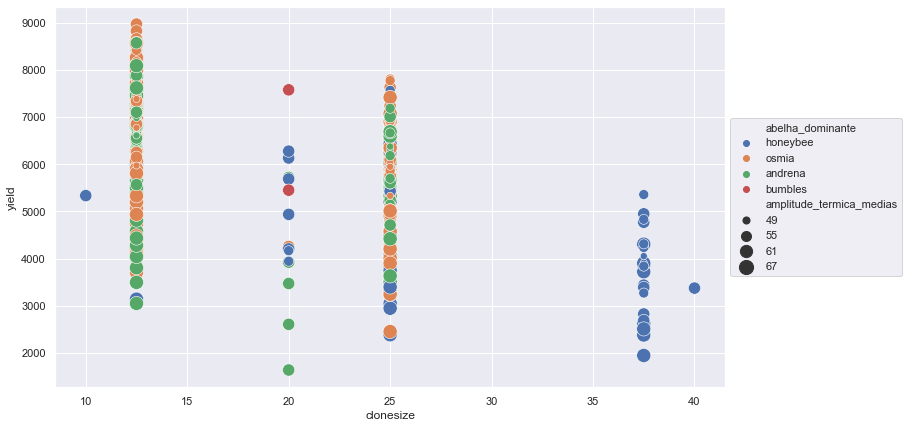

In [7]:
colunas_abelhas = ["honeybee", "bumbles", "andrena", "osmia"]
dataset["abelha_dominante"] = dataset[colunas_abelhas].idxmax(axis=1)

dataset["amplitude_termica_medias"] = (
    (dataset.AverageOfUpperTRange + dataset.AverageOfLowerTRange)/2
).astype(int)

g = sns.scatterplot(
    data=dataset,
    x="clonesize",
    y="yield",
    hue="abelha_dominante",
    size="amplitude_termica_medias",
    sizes=(50, 200),
)
g.legend(loc="center left", bbox_to_anchor=(1, 0.5))

g;


## Correlações

In [8]:
corr = dataset.corr()

corr.style.background_gradient(cmap='coolwarm')

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield,amplitude_termica_medias
clonesize,1.000000,0.119745,0.004807,-0.008451,-0.139049,0.034157,0.032854,0.033752,0.034295,0.033768,0.033566,-0.021696,-0.024455,-0.556591,-0.474038,-0.496156,-0.516737,0.034044
honeybee,0.119745,1.000000,-0.233954,-0.125913,-0.189058,0.026359,0.025467,0.026365,0.026477,0.026104,0.025647,-0.073818,-0.093477,-0.009406,-0.166419,-0.170808,-0.044250,0.026581
bumbles,0.004807,-0.233954,1.000000,0.010758,0.293665,-0.022863,-0.005801,-0.015821,-0.024662,-0.016801,-0.013985,0.058063,0.075376,0.289890,0.358202,0.380206,0.309407,-0.015485
andrena,-0.008451,-0.125913,0.010758,1.000000,0.387379,-0.026497,-0.023887,-0.025578,-0.026775,-0.025623,-0.025115,0.035297,0.043739,0.102549,0.092470,0.089178,0.140277,-0.025705
osmia,-0.139049,-0.189058,0.293665,0.387379,1.000000,-0.063755,-0.043237,-0.055441,-0.065910,-0.056546,-0.053141,0.083667,0.104188,0.334178,0.336136,0.353116,0.380892,-0.055282
MaxOfUpperTRange,0.034157,0.026359,-0.022863,-0.026497,-0.063755,1.000000,0.990961,0.998314,0.999900,0.998842,0.997658,-0.003286,-0.005677,-0.130450,0.058492,-0.034486,-0.187075,0.997728
MinOfUpperTRange,0.032854,0.025467,-0.005801,-0.023887,-0.043237,0.990961,1.000000,0.997056,0.988988,0.996267,0.997798,-0.000798,-0.001889,-0.119856,0.067671,-0.024240,-0.175883,0.997083
AverageOfUpperTRange,0.033752,0.026365,-0.015821,-0.025578,-0.055441,0.998314,0.997056,1.000000,0.997413,0.999944,0.999923,-0.002325,-0.004195,-0.125082,0.064034,-0.028925,-0.181774,0.999742
MaxOfLowerTRange,0.034295,0.026477,-0.024662,-0.026775,-0.065910,0.999900,0.988988,0.997413,1.000000,0.998071,0.996609,-0.003558,-0.006087,-0.130693,0.058487,-0.034674,-0.187439,0.996814
MinOfLowerTRange,0.033768,0.026104,-0.016801,-0.025623,-0.056546,0.998842,0.996267,0.999944,0.998071,1.000000,0.999787,-0.002403,-0.004334,-0.126788,0.062093,-0.030727,-0.183339,0.999586


Observamos que há dois grupos correlacionados: Temperaturas e Chuvas. Assim, escolhemos apenas uma váriável de cada grupo para incluir no nosso modelo:

- Temperaturas -> AverageOfUpperTRange
- Chuvas -> AverageRainingDays

Portanto, o dataframe que vamos utilizar como referência para o modelo é definido abaixo:

In [21]:
colunas_temperatura_chuvas = ['AverageOfUpperTRange', 'AverageRainingDays']
dataset_modelo = dataset[colunas_abelhas + colunas_temperatura_chuvas + ['yield']]

dataset_modelo

,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageRainingDays,yield
0,0.75,0.25,0.25,0.25,71.9,0.26,3813.165795
1,0.75,0.25,0.25,0.25,71.9,0.1,4947.605663
2,0.75,0.25,0.25,0.25,79.0,0.26,3866.798965
3,0.75,0.25,0.25,0.25,79.0,0.1,4303.94303
4,0.75,0.25,0.25,0.25,71.9,0.39,3436.493543
...,...,...,...,...,...,...,...
772,0.537,0.117,0.409,0.058,71.9,0.06,5333.873335
773,0.537,0.117,0.409,0.058,71.9,0.06,3373.436842
774,0.537,0.117,0.409,0.058,71.9,0.39,4203.027624
775,0.537,0.117,0.409,0.058,65.6,0.06,4166.299735


In [22]:
%store dataset_modelo

Stored 'dataset_modelo' (DataFrame)
